# Exploratory Data Analysis

## Project Introduction

We are asked to predict bandgap and formation energy for transparent conductors. Two types of data are given: crystal structure and atomic geometry. Training set is 2400 with values of bandgap and formation energy labeled, so it is a supervised learning and regression problem. Test set is 600. Dataset is not big.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from pymatgen.core import periodic_table

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
print('Train info')
train.info()


Train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2400 non-null   int64  
 1   spacegroup                  2400 non-null   int64  
 2   number_of_total_atoms       2400 non-null   float64
 3   percent_atom_al             2400 non-null   float64
 4   percent_atom_ga             2400 non-null   float64
 5   percent_atom_in             2400 non-null   float64
 6   lattice_vector_1_ang        2400 non-null   float64
 7   lattice_vector_2_ang        2400 non-null   float64
 8   lattice_vector_3_ang        2400 non-null   float64
 9   lattice_angle_alpha_degree  2400 non-null   float64
 10  lattice_angle_beta_degree   2400 non-null   float64
 11  lattice_angle_gamma_degree  2400 non-null   float64
 12  formation_energy_ev_natom   2400 non-null   float64
 13  bandgap_energy_ev     

In [8]:
print('Test info')
test.info()

Test info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          600 non-null    int64  
 1   spacegroup                  600 non-null    int64  
 2   number_of_total_atoms       600 non-null    float64
 3   percent_atom_al             600 non-null    float64
 4   percent_atom_ga             600 non-null    float64
 5   percent_atom_in             600 non-null    float64
 6   lattice_vector_1_ang        600 non-null    float64
 7   lattice_vector_2_ang        600 non-null    float64
 8   lattice_vector_3_ang        600 non-null    float64
 9   lattice_angle_alpha_degree  600 non-null    float64
 10  lattice_angle_beta_degree   600 non-null    float64
 11  lattice_angle_gamma_degree  600 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 56.4 KB


In [9]:
print('Train describe')
train.describe()

Train describe


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


In [10]:
print('Test describe')
test.describe()

Test describe


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,139.585000,61.733333,0.371005,0.313282,0.315711,10.097994,7.081782,12.442419,90.163120,92.485953,96.331507
std,173.349358,85.636414,22.975538,0.273049,0.245566,0.275717,5.715145,1.964818,5.442646,1.021673,5.409531,24.043137
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.073200,2.960100,5.698100,83.742600,82.753100,29.724200
25%,150.750000,33.000000,40.000000,0.125000,0.093800,0.062500,6.136725,5.829025,9.309275,89.999700,90.001100,89.998975
50%,300.500000,194.000000,80.000000,0.375000,0.250000,0.281200,9.495150,6.398400,10.096500,90.001600,90.003650,90.000400
75%,450.250000,206.000000,80.000000,0.562500,0.468800,0.468800,10.362800,9.157375,14.327925,90.006200,90.014525,119.998975
max,600.000000,227.000000,80.000000,1.000000,0.968800,0.968800,24.913400,10.249500,25.305700,100.950700,105.983800,120.054000


In [11]:
print('Train head')
train.head()

Train head


,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


## Inspect geometry file for id = 1

In [15]:
finp = open('train.csv').readlines()
#finp = pd.read_csv('train/1/geometry.xyz')
#print(*finp[:])  # File truncated to save space
print('(File truncated to save space)')

(File truncated to save space)


The total number of atoms includes O, whereas the percentage of Al, Ga, In sums up to 1 and does not include O!

In [16]:
#missing data
print('Missing train values = ',train.isnull().values.sum())
print('Missing test values = ',test.isnull().values.sum())

Missing train values =  0
Missing test values =  0


## Bandgap and Formation Energy

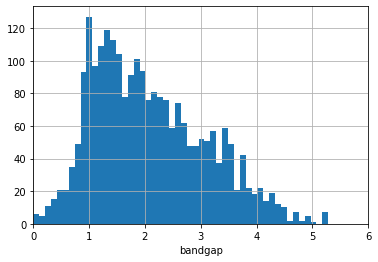

In [17]:
train.bandgap_energy_ev.hist(bins=50)
plt.xlabel('bandgap')
#train.bandgap_energy_ev.plot.density()
plt.xlim(0,6)
plt.show()

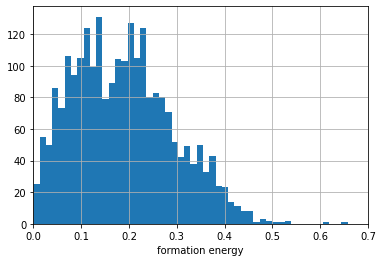

In [18]:
train.formation_energy_ev_natom.hist(bins=50)
plt.xlabel('formation energy')
#train.formation_energy_ev_natom.plot.density()
plt.xlim(0,0.7)
plt.show()

Bandgap and Formation energy both behave like normal distribution, where the range of bandgap is from 0 to ~5 eV, and formation from 0 to ~0.5 eV.

## Spacegroup

In [19]:
train.spacegroup.value_counts()

206    490
33     432
227    393
167    374
12     358
194    353
Name: spacegroup, dtype: int64

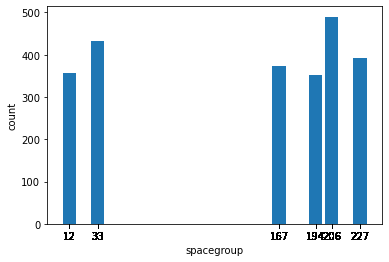

In [20]:
plt.bar(train.spacegroup.value_counts().index.values,train.spacegroup.value_counts(),width=10)
plt.xlabel('spacegroup')
plt.ylabel('count')
plt.xticks(train.spacegroup)
plt.show()

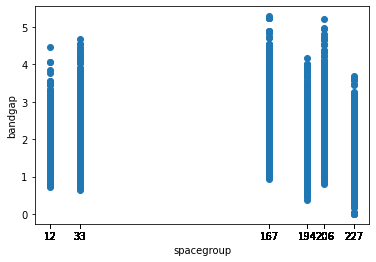

In [21]:
plt.scatter(train.spacegroup,train.bandgap_energy_ev)
plt.xlabel('spacegroup')
plt.ylabel('bandgap')
plt.xticks(train.spacegroup)
plt.show()

Looks like there's only 6 spacegroups and are distributed almost equally within the training set. SGs can be distinguished from each other, eg. 227 gives lower bandgap than the rest.

## N total atoms

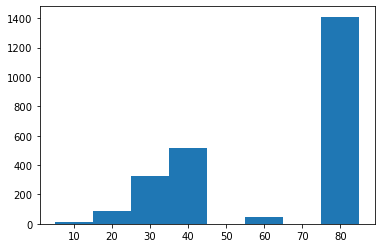

In [22]:
#train.number_of_total_atoms.hist(bins=100)
plt.bar(train.number_of_total_atoms.value_counts().index.values,train.number_of_total_atoms.value_counts(),width=10)
plt.show()

Number of total atoms take on discrete values, from 10 to 80, but not 50 and 70. Most data sets have 80 atoms.

## Percentage of Al, Ga, In

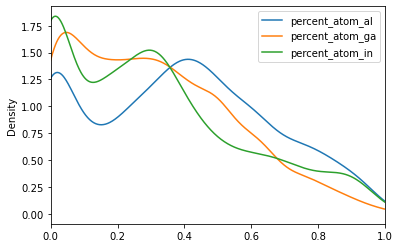

In [23]:
train.percent_atom_al.plot.density()
train.percent_atom_ga.plot.density()
train.percent_atom_in.plot.density()
plt.xlim(0,1)
plt.legend()
plt.show()
#피크 2개인거 Al 이랑 In 이고 1개인거 Ga임..

Al and Ga have two peaks, around 0 and 0.3-0.5, whereas most data has only 0.1 In.

In [24]:
print('Sum of percent of Al, Ga, In = ',train.percent_atom_al.values[0]+train.percent_atom_ga.values[0]+train.percent_atom_in.values[0])

#Al Ga In 다 퍼센트 다 합치면 1

Sum of percent of Al, Ga, In =  1.0


As pointed out earlier, total number of atom includes O, which is not included in the percent of Al, Ga, In.

## Lattice vectors and angles

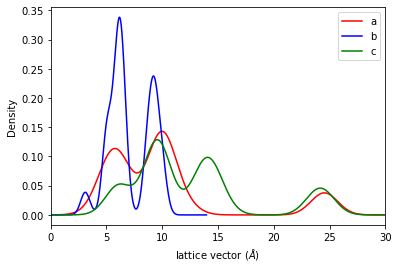

In [28]:
#train.lattice_vector_1_ang.hist(bins=100)
train.lattice_vector_1_ang.plot.density(color='red')
train.lattice_vector_2_ang.plot.density(color='blue')
train.lattice_vector_3_ang.plot.density(color='green')
plt.legend(['a','b','c'])
plt.xlabel('lattice vector ($\AA$)')
plt.xlim(0,30)
plt.show()
#b는 10 보다 작고, 5~10사이 값을 가짐, a랑 c 는 25 까지 올라감


Lattice a, b, c are unique. Lattice b is less than 10 A, and most frequent values are around 5 A and 10 A. Lattice a and c can go up to 25 A.

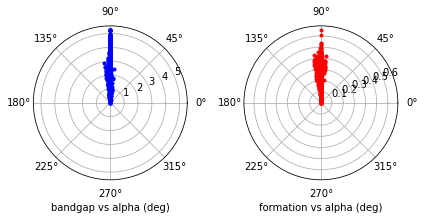

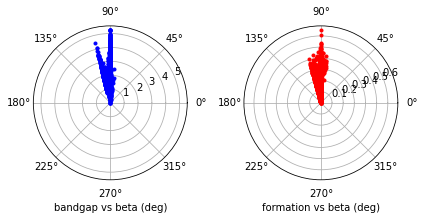

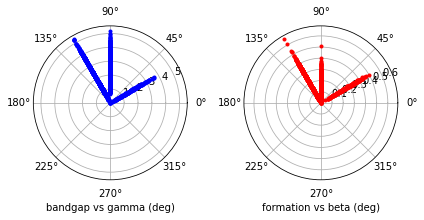

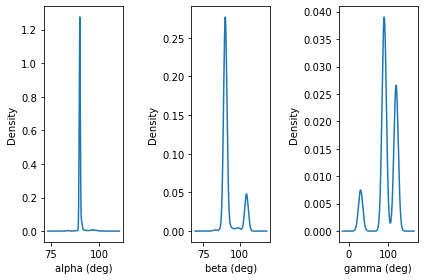

In [29]:
#alpha
plt.subplot(121,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_alpha_degree),train.bandgap_energy_ev,'b.')
plt.xlabel('bandgap vs alpha (deg)')
plt.subplot(122,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_alpha_degree),train.formation_energy_ev_natom,'r.')
plt.xlabel('formation vs alpha (deg)')
plt.tight_layout()
plt.show()

#beta
plt.subplot(121,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_beta_degree),train.bandgap_energy_ev,'b.')
plt.xlabel('bandgap vs beta (deg)')
plt.subplot(122,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_beta_degree),train.formation_energy_ev_natom,'r.')
plt.xlabel('formation vs beta (deg)')
plt.tight_layout()
plt.show()

#gamma
plt.subplot(1,2,1,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_gamma_degree),train.bandgap_energy_ev,'b.')
plt.xlabel('bandgap vs gamma (deg)')
plt.subplot(1,2,2,polar=True)
plt.polar(np.deg2rad(train.lattice_angle_gamma_degree),train.formation_energy_ev_natom,'r.')
plt.xlabel('formation vs beta (deg)')
plt.tight_layout()
plt.show()

plt.subplot(131)
train.lattice_angle_alpha_degree.plot.density()
plt.xlabel('alpha (deg)')
plt.subplot(132)
train.lattice_angle_beta_degree.plot.density()
plt.xlabel('beta (deg)')
plt.subplot(133)
train.lattice_angle_gamma_degree.plot.density()
plt.xlabel('gamma (deg)')
plt.tight_layout()
plt.show()

The angles seems to be discretized. Alpha is always 90 deg, beta is mostly 90 deg, sometimes 105 deg due to the restricted spacegroup. Gamma can take 30 deg, 90 deg and 120 deg.

## Feature Correlation

In [30]:
#알파는 항상90도, 베타는 거의 90도 + 약간의 105도, 감마는 30, 90, 120도 임

In [31]:
# 데이터셋에 존재하는 칼럼간의 수치적 상관관계 확인
train.corr()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
id,1.000000,0.042268,-0.037464,0.021495,-0.010629,-0.012250,-0.041701,-0.036477,0.041349,0.005916,-0.031354,0.008565,-0.008242,0.034987
spacegroup,0.042268,1.000000,-0.137534,0.052268,-0.053061,-0.005620,-0.570607,-0.012211,0.569755,0.183916,-0.584661,-0.007700,0.324927,-0.072725
number_of_total_atoms,-0.037464,-0.137534,1.000000,-0.106022,-0.012030,0.117657,0.397917,0.651364,-0.002656,-0.172047,0.039425,0.055687,-0.048631,-0.106125
percent_atom_al,0.021495,0.052268,-0.106022,1.000000,-0.450122,-0.609300,-0.154387,-0.179604,0.032261,0.019183,-0.099428,-0.019175,0.108481,0.738622
percent_atom_ga,-0.010629,-0.053061,-0.012030,-0.450122,1.000000,-0.433809,0.100244,-0.125285,-0.024424,0.000648,0.128669,0.010230,-0.374817,0.012831
percent_atom_in,-0.012250,-0.005620,0.117657,-0.609300,-0.433809,1.000000,0.066761,0.292472,-0.010866,-0.019929,-0.013933,0.010259,0.223383,-0.756668
lattice_vector_1_ang,-0.041701,-0.570607,0.397917,-0.154387,0.100244,0.066761,1.000000,-0.017117,-0.560387,0.002739,0.850079,-0.303708,-0.225600,-0.138901
lattice_vector_2_ang,-0.036477,-0.012211,0.651364,-0.179604,-0.125285,0.292472,-0.017117,1.000000,-0.256180,-0.114209,-0.365709,-0.146586,-0.104137,-0.127461
lattice_vector_3_ang,0.041349,0.569755,-0.002656,0.032261,-0.024424,-0.010866,-0.560387,-0.256180,1.000000,0.071834,-0.471228,0.328274,0.454679,-0.156865
lattice_angle_alpha_degree,0.005916,0.183916,-0.172047,0.019183,0.000648,-0.019929,0.002739,-0.114209,0.071834,1.000000,0.189144,-0.446694,0.099277,-0.072313


Let's visualize in a heat map.

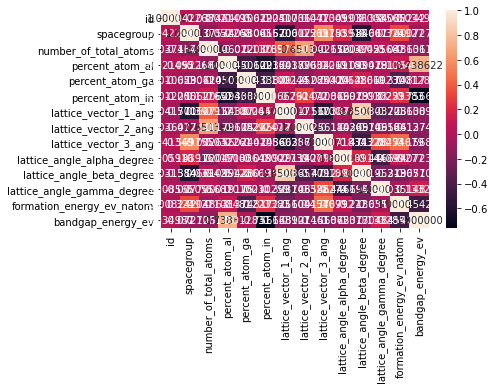

In [39]:
#plt.imshow(train.corr(),cmap='hot')
#plt.matshow(train.corr(),cmap='hot')
#plt.colorbar()
sns.heatmap(train.corr(),annot=True, fmt='f')
plt.show()

#badgap은 al 퍼센트와 상관관계가 가장 크고, In과는 음의 상관관계, Ga 와는 상관관계가 없다.
#Formation energy는 격자c와 Ga의 퍼센트에 약한 상관관계가 있고,
#Bandgap 과 Fromation energy는 서로 상관관계가 있다. 0.6정도.?

Bandgap has strong positive correlation with percent of Al, strong negative correlation with percent of In, and no correlation with percent of Ga. Formation energy is weakly (~0.4) correlated with lattice c and percent of Ga. Bandgap and formation energy are also somewhat correlated with each other.

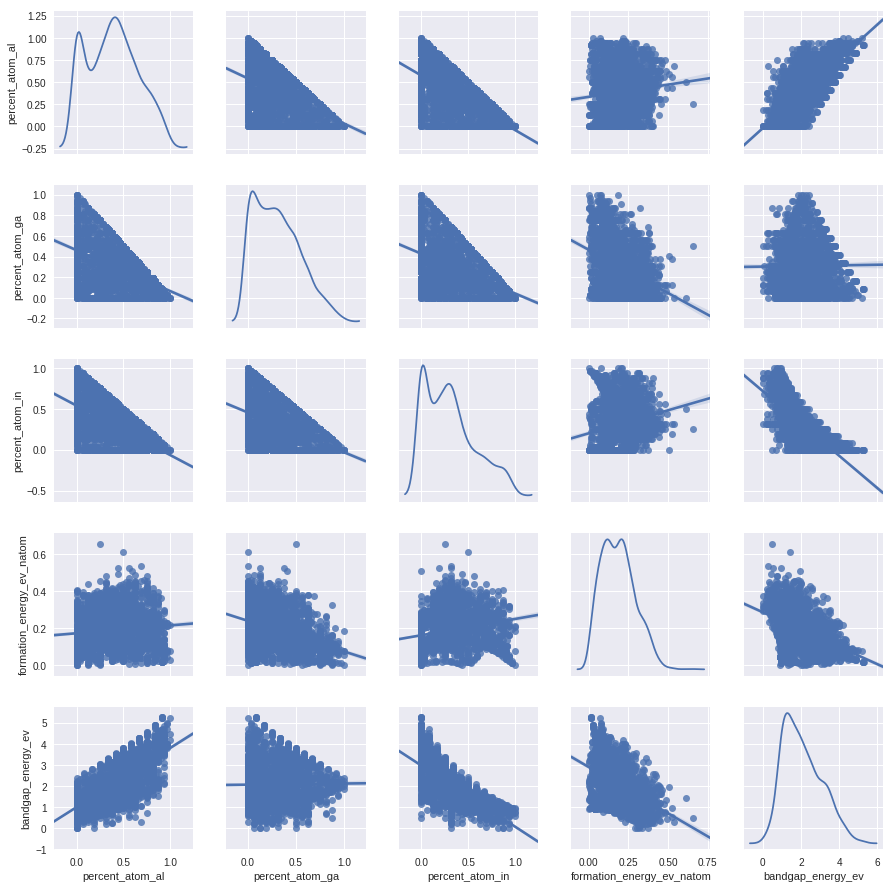

In [23]:
sns.pairplot(train,vars=['percent_atom_al','percent_atom_ga','percent_atom_in','formation_energy_ev_natom','bandgap_energy_ev'],kind='reg',diag_kind='kde')
plt.show()

The scatter plots agree with the correlation strength.

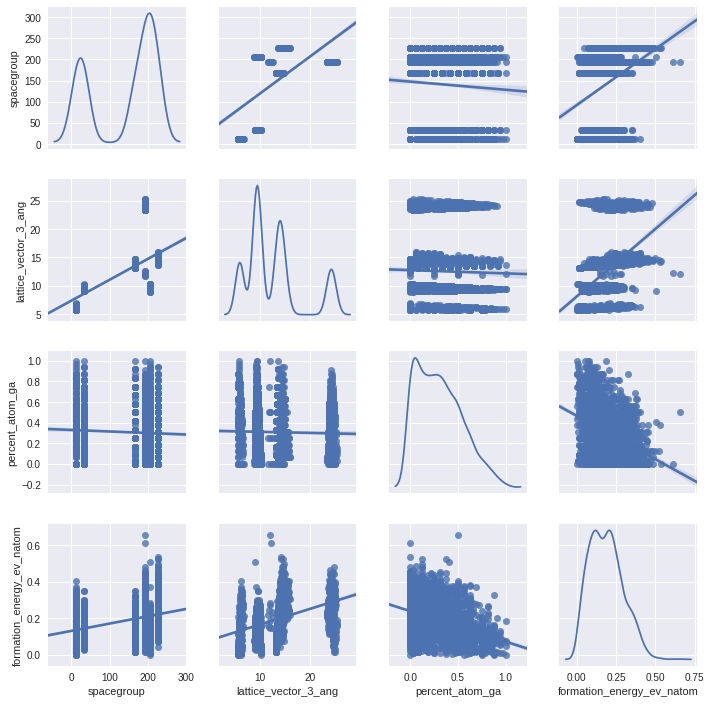

In [24]:
sns.pairplot(train,vars=['spacegroup','lattice_vector_3_ang','percent_atom_ga','formation_energy_ev_natom'],kind='reg',diag_kind='kde')
plt.show()

Eventhough the spacegroup, lattice c and percent of Ga shows some correlation with the formation energy, the regression doesn't fit too well.

## New feature generation: Volume

In [40]:
def get_vol(a,b,c,alpha,beta,gamma):
    
    vol = a*b*c*np.sqrt(1+2*np.cos(np.deg2rad(alpha))*np.cos(np.deg2rad(beta))*np.cos(np.deg2rad(gamma))-np.cos(np.deg2rad(alpha))**2-np.cos(np.deg2rad(beta))**2-np.cos(np.deg2rad(gamma))**2)
    
    return vol

In [41]:
train['vol'] = get_vol(train.lattice_vector_1_ang,train.lattice_vector_2_ang,train.lattice_vector_3_ang,train.lattice_angle_alpha_degree,train.lattice_angle_beta_degree,train.lattice_angle_gamma_degree)
test['vol'] = get_vol(test.lattice_vector_1_ang,test.lattice_vector_2_ang,test.lattice_vector_3_ang,test.lattice_angle_alpha_degree,test.lattice_angle_beta_degree,test.lattice_angle_gamma_degree)

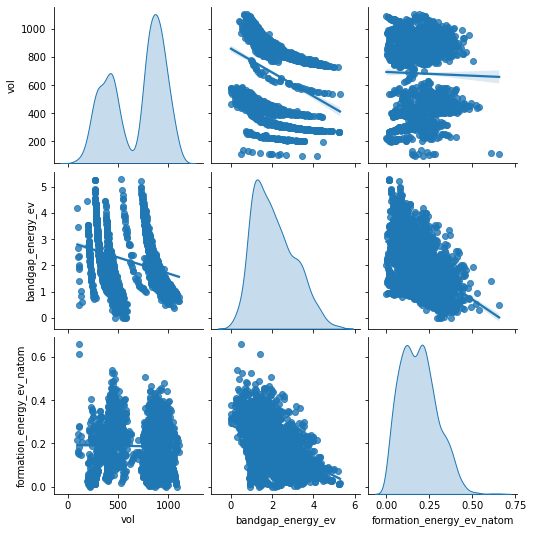

In [42]:
sns.pairplot(train,vars=['vol','bandgap_energy_ev','formation_energy_ev_natom'],kind='reg',diag_kind='kde')
plt.show()

Vol, a new feature generated from lattice, show some correlation with bandgap and formation energy.

## New feature generation: Total Mass of Al, Ga, In

In [43]:
def get_n_atom(df,df_name):
    
    N_Ga = []
    N_Al = []
    N_In = []
    N_O = []
    for i in df.id:
        n_Ga = 0
        n_Al = 0
        n_In = 0
        n_O = 0
        with open(str(df_name) + '/' + str(i) + '/geometry.xyz','r') as finp: 
            for line in finp:
                if line.split()[0] == 'atom':
                    if line.split()[4] == 'Ga':
                        n_Ga += 1
                    elif line.split()[4] == 'Al':
                        n_Al += 1
                    elif line.split()[4] == 'In':
                        n_In += 1
                    elif line.split()[4] == 'O':
                        n_O += 1
        N_Ga.append(n_Ga)
        N_Al.append(n_Al)
        N_In.append(n_In)
        N_O.append(n_O)
    df['n_ga'] = pd.DataFrame(N_Ga)
    df['n_al'] = pd.DataFrame(N_Al)
    df['n_in'] = pd.DataFrame(N_In)
    df['n_o'] = pd.DataFrame(N_O)
    
    return df['n_al'], df['n_ga'], df['n_in'], df['n_o']

In [44]:
def get_mass(df):
    
    mass_ga = periodic_table.Element['Ga'].atomic_mass
    mass_al = periodic_table.Element['Al'].atomic_mass
    mass_in = periodic_table.Element['In'].atomic_mass
    mass_o = periodic_table.Element['O'].atomic_mass
    tot_mass_ga = df['n_ga']*mass_ga
    tot_mass_al = df['n_al']*mass_al
    tot_mass_in = df['n_in']*mass_in
    tot_mass_o = df['n_o']*mass_o
    
    return tot_mass_al, tot_mass_ga, tot_mass_in, tot_mass_o

In [45]:
train.n_al, train.n_ga, train.n_in, train.n_o = get_n_atom(train,'train')
test.n_al, test.n_ga, test.n_in, test.n_o = get_n_atom(test,'test')

FileNotFoundError: [Errno 2] No such file or directory: 'train/1/geometry.xyz'

In [11]:
train['mass_al'], train['mass_ga'], train['mass_in'], train['mass_o'] = get_mass(train)
test['mass_al'], test['mass_ga'], test['mass_in'], test['mass_o'] = get_mass(test)

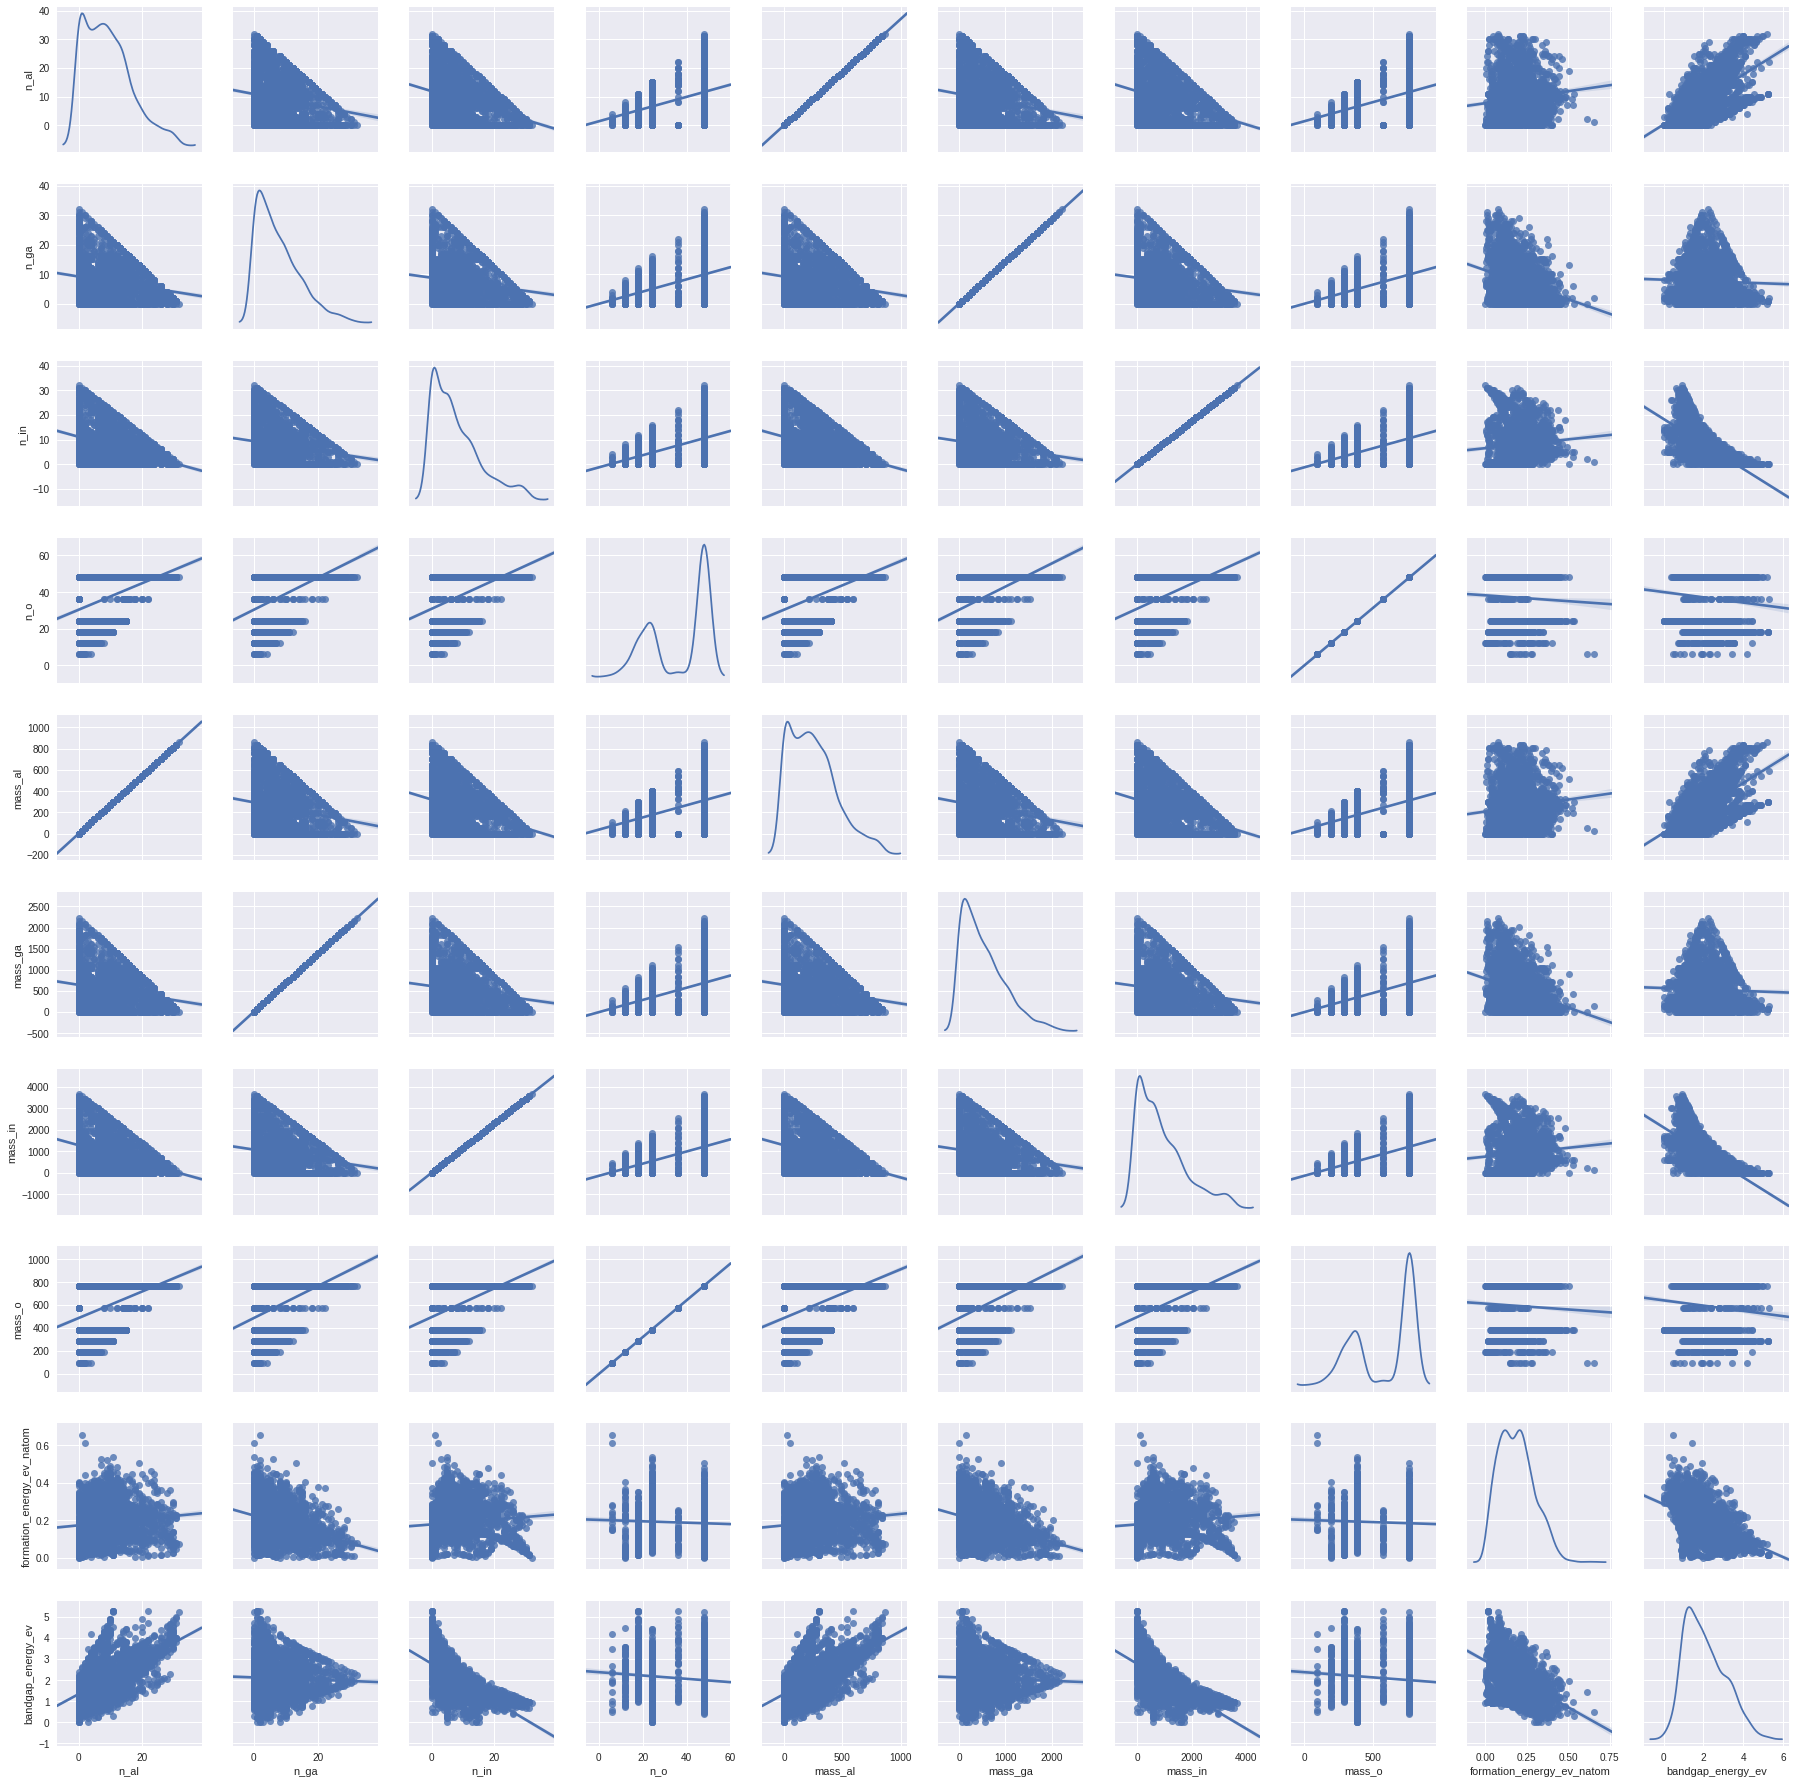

In [32]:
sns.pairplot(train,vars=['n_al','n_ga','n_in','n_o','mass_al','mass_ga','mass_in','mass_o','formation_energy_ev_natom','bandgap_energy_ev'],kind='reg',diag_kind='kde')
plt.show()

Al, Ga and In (except O) show good correlation with the bandgap and formation energy.